- **Programmer:**
    - **Shaun Pritchard**
    - **Ismael A Lopez** 

## **Assigment 3**
**Brief overview of assignment**

***perform a penalized
(regularized) logistic (multinomial) regression fit using ridge regression, with the model
parameters obtained by batch gradient descent. Your predictions will be based on K=5
continental ancestries (African, European, East Asian, Oceanian, or Native American). Ridge
regression will permit you to provide parameter shrinkage (tuning parameter 𝜆=0) to mitigate
overfitting. The tuning parameter 𝜆 will be chosen using five-fold cross validation, and the best-
fit model parameters will be inferred on the training dataset conditional on an optimal tuning
parameter. This trained model will be used to make predictions on new test data points***

> ***Table of Contents***
<hr>


* [Import Packages](#Import_Packages)
    * [Import packages for manipulating data](#Import_packages_for_manipulating_data)
    * [Import packages for splitting data](#Import_packages_for_splitting_data)
    * [Import packages for modeling data](#Import_packages_for_modeling_data)
    * [Import packages for Scaling and Centering data](#Import_packages_for_Scaling_and_Centering_data)
    * [Import packages for Measuring Model Perormance](#Import_packages_for_Measuring_Model_Perormance)
    
* [Data Processing](#Data_Processing)
    * [Import Data](#Import_data)
    * [Lets change the categorical values](#Lets_change_the_categorical_values)
    * [Create Predictor and Target numpy array](#Create_Predictor_and_Target_numpy_array)
    * [Create a Normalize copy of variables](#Create_a_Normalize_copy_of_variables)
    * [Split Data](#Split_Data:)
* [Regression Model](#Regression_Model)
    * [Define our learning rates:](#Define_our_learning_rates)
    * [Create the Regression Objects](#Create_the_Regression_Objects)
        * [LogisticRegression Library](#LogisticRegression_Library)



> ***Deliverables***
<hr>

* [**Deliverable 6.1**](#Deliverable_6.1)
* [**Deliverable 6.2**](#Deliverable_6.2)
* [**Deliverable 6.3**](#Deliverable_6.3)
* [**Deliverable 6.4**](#Deliverable_6.4)
* [**Deliverable 6. Reason for difference**](#Deliverable_6_Reason_for_difference)

# Import Packages <a class="anchor" id="Import_Packages"></a>

### Import packages for manipulating data  <a class="anchor" id="Import_packages_for_manipulating_data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.mlab as mlab
import math
import csv
import random
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math


### Import packages for splitting data  <a class="anchor" id="Import_packages_for_splitting_data"></a>

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV


### Import packages for modeling data  <a class="anchor" id="Import_packages_for_modeling_data"></a>

In [3]:
# Import models:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as linearR_Model, Ridge  as RidgeR_Model
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import LogisticRegression


from sklearn.exceptions import ConvergenceWarning
#from sklearn.utils._testing import ignore_warnings
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning) # To filter out the Convergence warning
warnings.filterwarnings('ignore', category=UserWarning)
from itertools import product


### Import packages for Scaling and Centering data  <a class="anchor" id="Import_packages_for_Scaling_and_Centering_data"></a>

In [4]:
from sklearn.preprocessing import StandardScaler

### Import packages for Measuring Model Perormance  <a class="anchor" id="Import_packages_for_Measuring_Model_Perormance"></a>

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

# Data Processing <a class="anchor" id="Data_Processing"></a>

### Import Data  <a class="anchor" id="Import_data"></a>

***Traing Dataset***

In [6]:
Train_dataset = pd.read_csv ('TrainingData_N183_p10.csv')
Train_dataset.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African


In [7]:
# What are the datatypes of each observation:
print(Train_dataset.dtypes)
# Shape of my data
print('The size of our data are: ',Train_dataset.shape)

PC1         float64
PC2         float64
PC3         float64
PC4         float64
PC5         float64
PC6         float64
PC7         float64
PC8         float64
PC9         float64
PC10        float64
Ancestry     object
dtype: object
The size of our data are:  (183, 11)


In [8]:
print('Training Dataset Missing Values: \n',Train_dataset.isnull().sum())


Training Dataset Missing Values: 
 PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64


***Test Dataset***

In [9]:
Test_dataset = pd.read_csv ('TestData_N111_p10.csv')
Test_dataset.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown


In [10]:
# What are the datatypes of each observation:
print(Test_dataset.dtypes)
# Shape of my data
print('The size of our data are: ',Test_dataset.shape)

PC1         float64
PC2         float64
PC3         float64
PC4         float64
PC5         float64
PC6         float64
PC7         float64
PC8         float64
PC9         float64
PC10        float64
Ancestry     object
dtype: object
The size of our data are:  (111, 11)


In [11]:
# Are there any null or missing values
print('Test Dataset Missing Values: \n',Test_dataset.isnull().sum())

Test Dataset Missing Values: 
 PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64


### Lets change the categorical values  <a class="anchor" id="Lets_change_the_categorical_values"></a>


In [12]:
# recode the categories
Training_Class = Train_dataset['Ancestry'].unique().tolist()
Test_Class = Test_dataset['Ancestry'].unique().tolist()
num_features = len(Training_Class)


print("Unique Values for Train Ancestry: ", Training_Class)
print("Unique Values for Test Ancestry: ", Test_Class)


Unique Values for Train Ancestry:  ['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican']
Unique Values for Test Ancestry:  ['Unknown', 'Mexican', 'AfricanAmerican']


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Train_dataset['Ancestry_Encoded'] = le.fit_transform(Train_dataset.iloc[:,-1:])
Test_dataset['Ancestry_Encoded'] = le.fit_transform(Test_dataset.iloc[:,-1:])

In [14]:
Train_dataset.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,Ancestry_Encoded
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African,0
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African,0
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African,0


### Create Predictor and Target numpy array  <a class="anchor" id="Create_Predictor_and_Target_numpy_array"></a>

In [15]:
# Target:
Y_Train= Train_dataset['Ancestry_Encoded'].to_numpy()
Y_Test= Test_dataset['Ancestry_Encoded'].to_numpy()
Y_Train.shape

(183,)

In [16]:
# Convert the Pandas dataframe to numpy ndarray for computational improvement
X_Train = Train_dataset.iloc[:,:-2].to_numpy()
X_Test = Test_dataset.iloc[:,:-2].to_numpy()

print(type(X_Train), X_Train[:1], "Shape = ", X_Train.shape)

<class 'numpy.ndarray'> [[-10.90117144   0.79874334  -1.14330096  -1.07096001  11.85639581
   -2.2659654    4.5364047    1.51995913  -2.21429419  -0.67127393]] Shape =  (183, 10)


### Create a Normalize copy of variables <a class="anchor" id="Create_a_Normalize_copy_of_variables"></a>

In [17]:
# Create Standarizing ObjectPackages:
standardization = StandardScaler()

# Strandardize 
n_observations = len(Train_dataset)
variables = Train_dataset.columns


# Standardize the Predictors (X)
X_Train = standardization.fit_transform(X_Train)

# Add a constanct to the predictor matrix
#X_Train = np.column_stack((np.ones(n_observations),X_Train))


# Save the original M and Std of the original data. Used for unstandardize
original_means = standardization.mean_

# we chanced standardization.std_ to standardization.var_**.5
originanal_stds = standardization.var_**.5


print("observations :", n_observations)
print("variables :", variables[:2])
print('original_means :', original_means)
print('originanal_stds :', originanal_stds)




observations : 183
variables : Index(['PC1', 'PC2'], dtype='object')
original_means : [ 1.40487976e+00  2.02293488e+00  1.91271130e-03  1.02811502e-01
  2.43929372e-01  2.93901516e-01  4.37620184e-02 -1.85769325e-01
  1.03879526e-01 -4.17198356e-02]
originanal_stds : [4.8993287  3.47654999 3.90903976 3.149965   2.14032401 1.77048761
 1.58593444 1.50391174 1.58141009 0.97706561]


### Split Data: <a class="anchor" id="Split_Data:"></a>

#let's first split it into train and test part
X_train, X_out_sample, y_train, y_out_sample = train_test_split(Xst, y_Centered, test_size=0.40, random_state=101) # Training and testing split

X_validation, X_test, y_validation, y_test = train_test_split(X_out_sample, y_out_sample, test_size=0.50, random_state=101) # Validation and test split

# Print Data size
print ("Train dataset sample size: {}".format(len(X_train)))
print ("Validation dataset sample size: {}".format(len(X_validation)))
print ("Test dataset sample size: {}".format( len(X_test)))

# Regression Model <a class="anchor" id="Regression_Model"></a>
<hr>

### Define our learning rates <a class="anchor" id="Define_our_learning_rates"></a>

In [18]:
# Define my tuning parameter values 𝜆:

learning_rates_λ = [1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]
print(learning_rates_λ)

# learning rate
α =  1e-4

# K-folds
k = 5


# Itterations
n_iters = 10000 


[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]


### Create the Regression Objects <a class="anchor" id="Create_the_Regression_Objects"></a>

**LogisticRegression Library** <a class="anchor" id="LogisticRegression_Library"></a>

In [19]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Library_LogisticRegression = LogisticRegression(max_iter = 10000, multi_class='multinomial', solver='lbfgs', penalty='l2', C=1)


## **Deliverable 7.1**  <a class="anchor" id="Deliverable_6.1"></a>
<h>

> Deliverable 1: Illustrate the effect of the tuning parameter on the inferred ridge regression coefficients by generating five plots (one for each of the 𝐾=5 ancestry classes) of 10 lines (one for each of the 𝑝=10 features), with the 𝑦-axis as 𝛽̂
𝑗𝑘, 𝑗=1,2,…,10 for the graph of class 𝑘, and 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that
7
generated the particular 𝛽̂
𝑗𝑘. Label both axes in all five plots. Without the log scaling of the tuning parameter, the plot will look distorted.

**LogisticRegression with Library**

In [20]:
L𝛽_per_λ=[] # set empty list

# Evaluate tuning parameters with LogisticRegression penalty
for tuning_param in learning_rates_λ:
        Library_LogisticRegression = LogisticRegression(max_iter = 10000, multi_class = 'multinomial', solver = 'lbfgs', penalty ='l2', C = tuning_param)
        Library_LogisticRegression.fit(X_Train, Y_Train)
        c = np.array(Library_LogisticRegression.coef_)
       # c = np.append(tuning_param,c)
        L𝛽_per_λ.append(Library_LogisticRegression.coef_)
#        print(c)


In [21]:
L𝛽_per_λ[0]

array([[-5.99624844e-03,  2.96117039e-04, -8.73802214e-04,
        -2.04099800e-04,  1.39486513e-03, -5.71819264e-04,
        -5.20972427e-04,  1.07976342e-04,  1.04013395e-03,
        -6.51753379e-04],
       [ 3.17782901e-03,  3.20405131e-03, -2.75595421e-04,
         7.25605495e-03, -5.20324070e-04, -9.23717795e-04,
        -9.90076526e-05,  7.45094436e-04,  4.01783544e-04,
        -1.52613597e-03],
       [ 1.95202263e-04, -6.24913113e-03,  9.13687544e-04,
        -4.18520330e-04, -5.83513899e-04,  3.02492530e-03,
         7.84272369e-04, -2.65956521e-03, -1.24063618e-03,
        -4.04365901e-04],
       [ 2.28441492e-03, -5.37970381e-04, -4.83132244e-03,
        -3.44509733e-03, -1.70996181e-04, -1.31009775e-03,
        -9.47052680e-05,  1.90245786e-03,  5.30506344e-04,
         3.67778162e-03],
       [ 3.38802248e-04,  3.28693316e-03,  5.06703253e-03,
        -3.18833750e-03, -1.20030982e-04, -2.19290489e-04,
        -6.95870212e-05, -9.59634295e-05, -7.31787661e-04,
        -1.

In [22]:
# Loop throught the betas, by class generated by each lamda
temp_df = []
for l in range(np.array(L𝛽_per_λ).shape[0]):
    for c in range(np.array(L𝛽_per_λ).shape[1]):
        temp_df.append(np.append(L𝛽_per_λ[l][c],(learning_rates_λ[l],c)))

In [23]:
TunnedL𝛽_df=pd.DataFrame(np.array(temp_df))
TunnedL𝛽_df.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'Lambda', 'Class']
#TunnedL𝛽_df['Class_Name'] = TunnedL𝛽_df['Class_Name'].apply(lambda x: Training_Class[int(x)])
TunnedL𝛽_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Lambda,Class
0,-0.005996,0.000296,-0.000874,-0.000204,0.001395,-0.000572,-0.000521,0.000108,0.001040,-0.000652,0.0001,0.0
1,0.003178,0.003204,-0.000276,0.007256,-0.000520,-0.000924,-0.000099,0.000745,0.000402,-0.001526,0.0001,1.0
2,0.000195,-0.006249,0.000914,-0.000419,-0.000584,0.003025,0.000784,-0.002660,-0.001241,-0.000404,0.0001,2.0
3,0.002284,-0.000538,-0.004831,-0.003445,-0.000171,-0.001310,-0.000095,0.001902,0.000531,0.003678,0.0001,3.0
4,0.000339,0.003287,0.005067,-0.003188,-0.000120,-0.000219,-0.000070,-0.000096,-0.000732,-0.001096,0.0001,4.0
5,-0.058225,0.002975,-0.008652,-0.001678,0.013273,-0.005503,-0.005145,0.001171,0.009987,-0.006234,0.0010,0.0
6,0.030222,0.029984,-0.002905,0.068954,-0.004819,-0.008493,-0.000758,0.006758,0.003699,-0.014060,0.0010,1.0
7,0.002223,-0.059828,0.008914,-0.003635,-0.005770,0.028374,0.007473,-0.024838,-0.011794,-0.003760,0.0010,2.0
8,0.022178,-0.004906,-0.046279,-0.032885,-0.001479,-0.012364,-0.000878,0.017768,0.005104,0.034395,0.0010,3.0
9,0.003602,0.031775,0.048922,-0.030756,-0.001205,-0.002014,-0.000692,-0.000860,-0.006996,-0.010341,0.0010,4.0


In [24]:
Training_Class

['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican']

In [25]:
TunnedL𝛽_df[TunnedL𝛽_df.Class.eq(0)]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Lambda,Class
0,-0.005996,0.000296,-0.000874,-0.000204,0.001395,-0.000572,-0.000521,0.000108,0.001040,-0.000652,0.0001,0.0
5,-0.058225,0.002975,-0.008652,-0.001678,0.013273,-0.005503,-0.005145,0.001171,0.009987,-0.006234,0.0010,0.0
10,-0.416015,0.024907,-0.067488,-0.003388,0.072555,-0.034205,-0.039842,0.013773,0.064152,-0.037821,0.0100,0.0
15,-1.121139,0.088450,-0.184898,-0.000300,0.106416,-0.073681,-0.088256,0.039909,0.131243,-0.075570,0.1000,0.0
20,-1.856416,0.171097,-0.302337,-0.013588,0.119443,-0.101231,-0.125461,0.057246,0.167461,-0.101574,1.0000,0.0
25,-2.629643,0.258769,-0.422799,-0.048509,0.129216,-0.125794,-0.160011,0.069995,0.197318,-0.121781,10.0000,0.0
30,-3.460491,0.345159,-0.551590,-0.103982,0.147973,-0.157358,-0.182351,0.081515,0.230535,-0.132847,100.0000,0.0
35,-4.365979,0.416449,-0.680557,-0.168647,0.204572,-0.214614,-0.199244,0.088890,0.276065,-0.132921,1000.0000,0.0
40,-5.345176,0.512502,-0.880163,-0.290699,0.174939,-0.268239,-0.120009,0.114853,0.264026,-0.089241,10000.0000,0.0


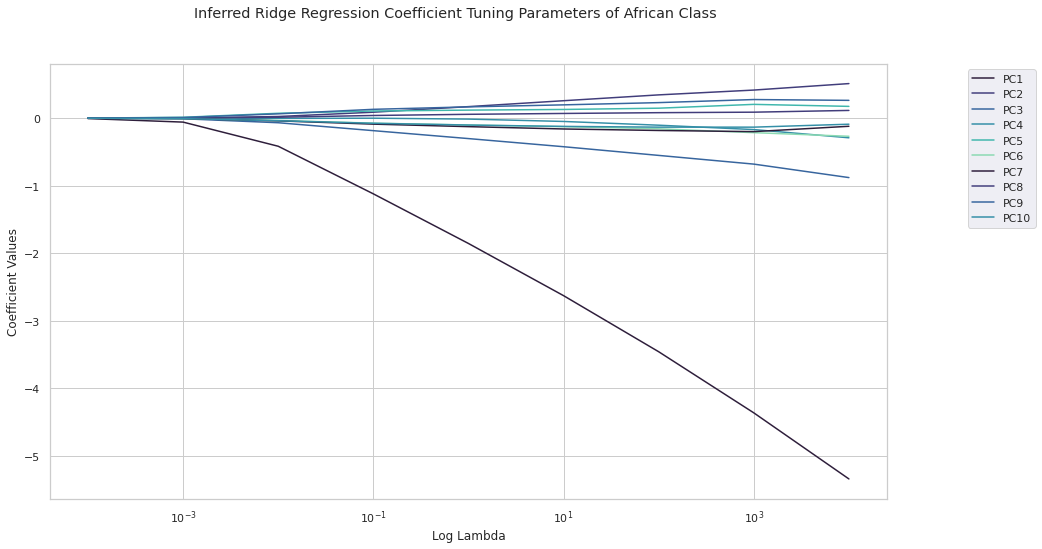

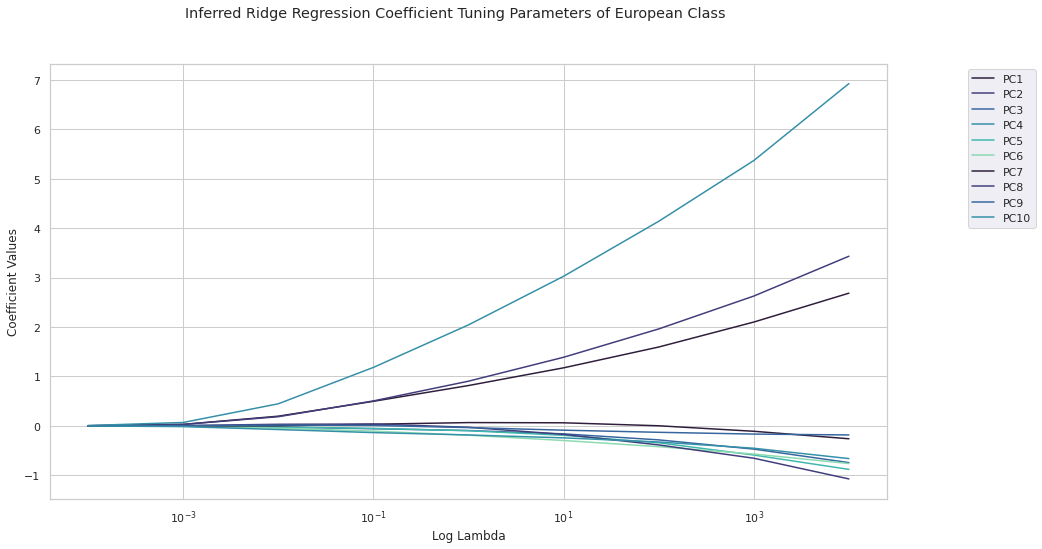

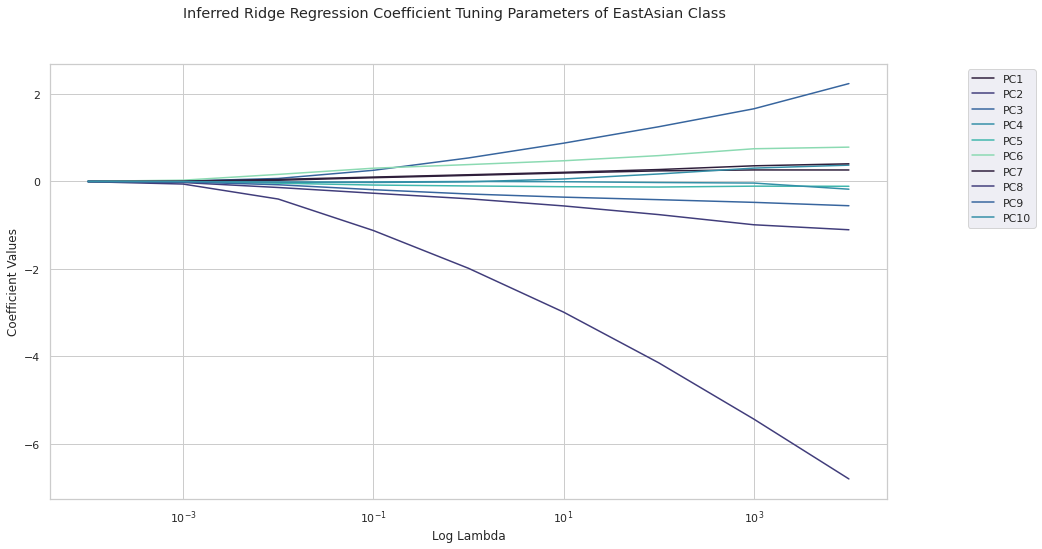

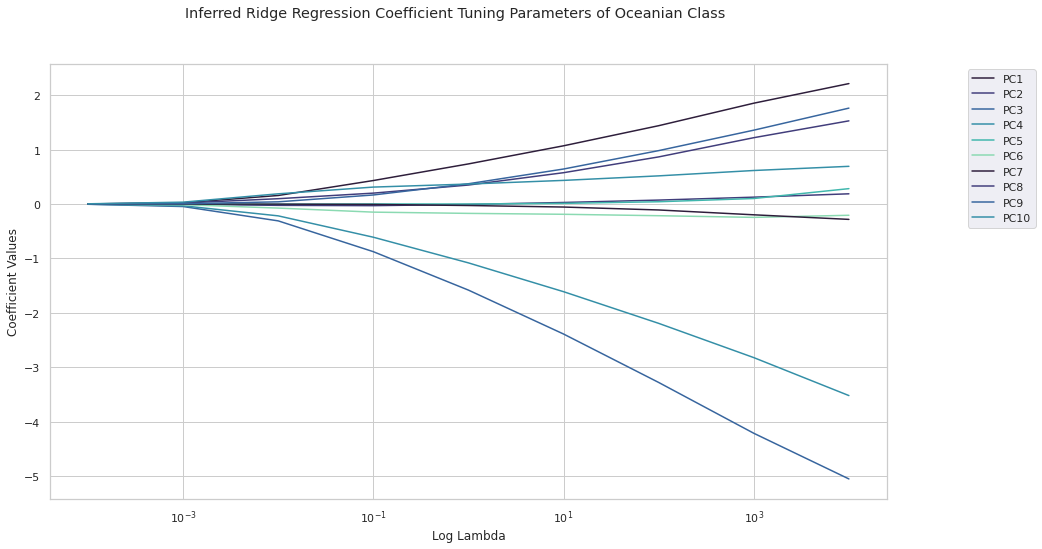

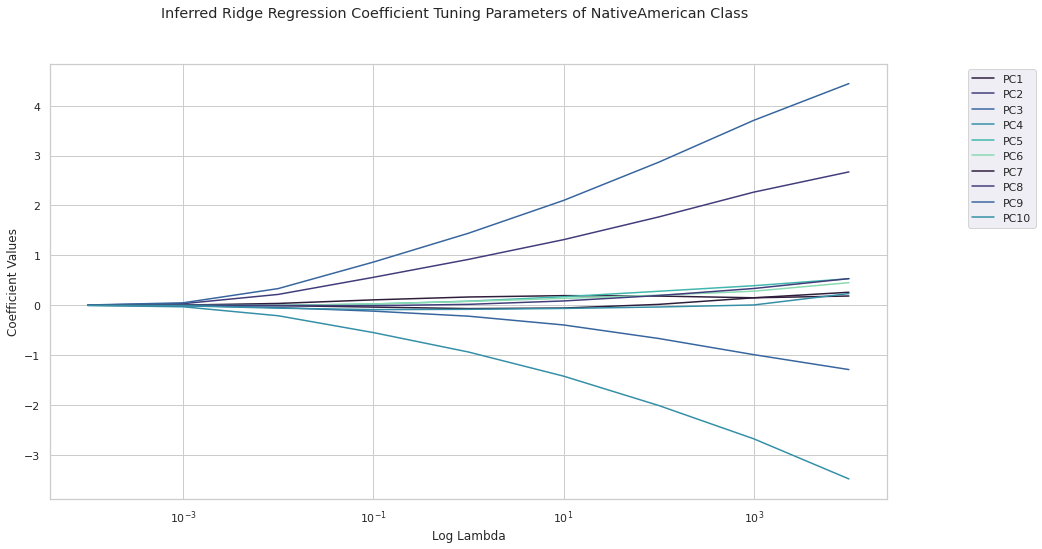

In [26]:
# Plot tuning parameter on the inferred ridge regression coefficients
sns.set(rc = {'figure.figsize':(15,8)})
for i, c in enumerate(Training_Class):
    sns.set_theme(style="whitegrid")
    sns.set_palette("mako")
    for j in range(1, 1 + X_Train.shape[1]):
        sns.lineplot( x =  TunnedL𝛽_df[TunnedL𝛽_df.Class.eq(i)]['Lambda'], y = TunnedL𝛽_df[TunnedL𝛽_df.Class.eq(i)]['PC{}'.format(j)], palette='mako',   label = 'PC{}'.format(j) )
        sns.set()
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.09, 1), loc='upper left')
    plt.xlabel('Log Lambda')
    plt.ylabel('Coefficient Values')
    plt.suptitle('Inferred Ridge Regression Coefficient Tuning Parameters of' + ' ' + c + ' ' + 'Class')
    plt.show()    
   

# **Deliverable 7.2**  <a class="anchor" id="Deliverable_6.2"></a>
Illustrate the effect of the tuning parameter on the cross validation error by generating a plot with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes in the plot. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

**CV Elastic Net with Library**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Define the model
Library_LogisticRegression = LogisticRegression(max_iter = 10000, multi_class = 'multinomial', solver = 'lbfgs', penalty ='l2')


# Create the Kfold:
cv_iterator = KFold(n_splits = 5, shuffle=True, random_state=101)

cv_score = cross_val_score(Library_LogisticRegression, X_Train, Y_Train, cv=cv_iterator, scoring='neg_mean_squared_error', n_jobs=1)
print (cv_score)
print ('Cv score: mean %0.3f std %0.3f' % (np.mean(cv_score), np.std(cv_score))) 



[-0. -0. -0. -0. -0.]
Cv score: mean 0.000 std 0.000


In [28]:
# define grid
Parm_grid = dict()
Parm_grid['C'] = learning_rates_λ
Parm_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

In [29]:
# Lets define search
GsearchCV = GridSearchCV(estimator = Library_LogisticRegression, param_grid = Parm_grid, scoring = 'neg_mean_squared_error', n_jobs=1, refit=True, cv=cv_iterator)
GsearchCV.fit(X_Train, Y_Train)



GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0, 10000.0]},
             scoring='neg_mean_squared_error')

In [30]:
GCV_df = pd.concat([pd.DataFrame(GsearchCV.cv_results_["params"]),pd.DataFrame(GsearchCV.cv_results_["mean_test_score"], columns=["mean_test_score"])],axis=1)
#GCV_df.index=GCV_df['alpha']
GCV_df.rename(columns={"C": "learning_rates_λ"}, inplace=True)

GCV_df

,learning_rates_λ,mean_test_score
0,0.0001,-2.404354
1,0.0010,-2.404354
2,0.0100,-0.322222
3,0.1000,0.000000
4,1.0000,0.000000
5,10.0000,0.000000
6,100.0000,0.000000
7,1000.0000,0.000000
8,10000.0000,0.000000


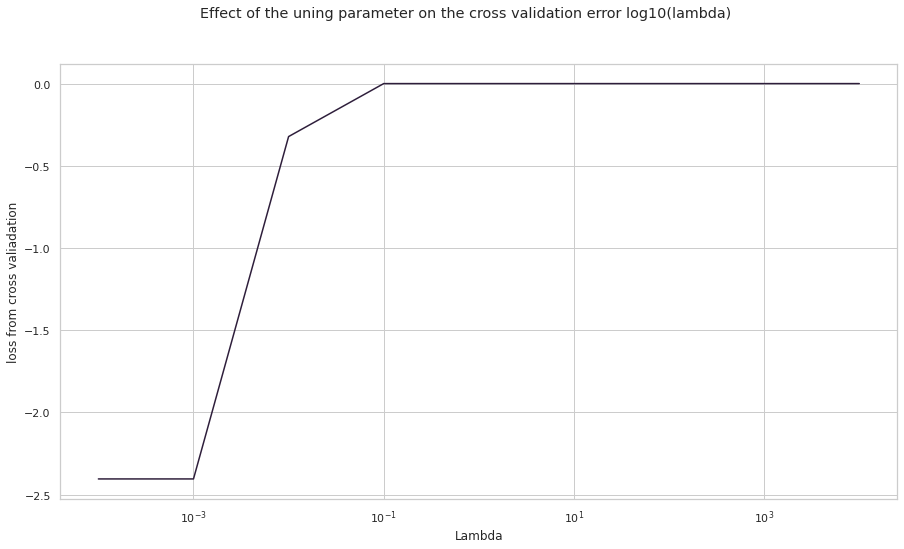

In [31]:

sns.set_theme(style="whitegrid")
sns.set_palette("mako")


plt.plot(GCV_df["learning_rates_λ"] , GCV_df["mean_test_score"])


sns.set_palette("mako")
sns.set()


plt.suptitle('Effect of the uning parameter on the cross validation error log10(lambda)')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('loss from cross valiadation')
plt.show()

# **Deliverable 7.3**  <a class="anchor" id="Deliverable_6.3"></a>
Indicate the value of 𝜆 that generated the smallest CV(5) error

**Smallest CV with Library**

In [32]:
print ('Best: ',GsearchCV.best_params_)
print ('Best CV mean squared error: %0.3f' % np.abs(GsearchCV.best_score_))

Best:  {'C': 0.1}
Best CV mean squared error: 0.000


In [33]:
GCV_df.sort_values(by=['mean_test_score'], ascending=False)[:1]


,learning_rates_λ,mean_test_score
3,0.1,0.0


In [34]:
# Alternative: sklearn.linear_model.ElasticNetCV
from sklearn.linear_model import LogisticRegressionCV

auto_LR = LogisticRegressionCV(Cs = learning_rates_λ, cv=5, max_iter = 10000, multi_class = 'multinomial', solver = 'lbfgs', penalty ='l2', n_jobs= 1 )
auto_LR.fit(X_Train, Y_Train)
#print ('Best alpha: %0.5f' % auto_LR.alpha_)
print ('Best 𝜆: ' , auto_LR.C_)

Best 𝜆:  [0.1 0.1 0.1 0.1 0.1]


# **Deliverable 7.4**  <a class="anchor" id="Deliverable_6.4"></a>

Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁=183 observations to obtain an estimate of the (𝑝+1)×𝐾 model parameter matrix as 𝐁̂ and make predictions of the probability for each of the 𝐾=5 classes for the 111 test individuals located in TestData_N111_p10.csv. That is, for class 𝑘, compute 
𝑝𝑘(𝑋;𝐁̂)=exp(𝛽̂0𝑘+Σ𝑋𝑗𝛽̂ 𝑗𝑘𝑝𝑗=1)
/ Σexp(𝛽̂0ℓ+Σ𝑋𝑗𝛽̂ 𝑗ℓ𝑝𝑗=1)

- for each of the 111 test samples 𝑋, and also predict the most probable ancestry label as 
    - 𝑌̂(𝑋)=arg max𝑘∈{1,2,…,𝐾}𝑝𝑘(𝑋;𝐁̂)
- Report all six values (probability for each of the 𝐾=5 classes and the most probable ancestry label) for all 111 test individuals.

**Tunned with best λ with Library**

In [35]:
Library_LogisticRegression_best= LogisticRegression(max_iter = 10000, multi_class='multinomial', solver='lbfgs', penalty='l2', C= auto_LR.C_[0])
Library_LogisticRegression_best.fit( X_Train, Y_Train )

y_predM_best = Library_LogisticRegression_best.predict(X_Test)
print ("Betas= ", np.mean(Library_LogisticRegression_best.coef_, 0))



Betas=  [ 1.97064587e-16  1.11022302e-16 -4.44089210e-17  0.00000000e+00
 -5.41233725e-17 -6.03683770e-17 -1.94289029e-17  2.25514052e-17
 -4.99600361e-17  4.99600361e-17]


In [36]:
yhat = Library_LogisticRegression_best.predict_proba(X_Test)
# summarize the predicted probabilities
print('Predicted Probabilities: %s' % yhat[0])

Predicted Probabilities: [2.65398539e-08 4.07623241e-07 4.19578741e-08 3.58579025e-08
 9.99999488e-01]


In [37]:
ŷ_test = Library_LogisticRegression_best.predict_proba(X_Test)
ŷ_test[:3]

array([[2.65398539e-08, 4.07623241e-07, 4.19578741e-08, 3.58579025e-08,
        9.99999488e-01],
       [3.42825046e-08, 3.12778397e-05, 2.56848531e-06, 9.99964053e-01,
        2.06669173e-06],
       [3.56852016e-04, 2.09402026e-02, 9.76706428e-01, 7.64024238e-04,
        1.23249309e-03]])

In [38]:
Y_class = Library_LogisticRegression_best.predict(X_Test)
Y_class

array([4, 3, 2, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1,
       3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [39]:
# Re-lable feature headers and add new class prediction index column
new_colNames = ['{}_Probability'.format(c_name) for c_name in Training_Class] + ['ClassPredInd']
new_colNames

['African_Probability',
 'European_Probability',
 'EastAsian_Probability',
 'Oceanian_Probability',
 'NativeAmerican_Probability',
 'ClassPredInd']

In [40]:
# Implemnt index array of probabilities
i_prob = np.concatenate((ŷ_test, Y_class[:, None]), 1)

In [41]:
# Create New dataframe for probality indeces
df2 = pd.DataFrame(i_prob, columns = new_colNames)
df2

,African_Probability,European_Probability,EastAsian_Probability,Oceanian_Probability,NativeAmerican_Probability,ClassPredInd
0,2.653985e-08,4.076232e-07,4.195787e-08,3.585790e-08,9.999995e-01,4.0
1,3.428250e-08,3.127784e-05,2.568485e-06,9.999641e-01,2.066692e-06,3.0
2,3.568520e-04,2.094020e-02,9.767064e-01,7.640242e-04,1.232493e-03,2.0
3,9.999789e-01,4.743223e-08,7.266109e-08,9.399326e-08,2.089339e-05,0.0
4,4.452492e-08,9.999914e-01,4.315461e-08,7.712259e-06,7.837322e-07,1.0
...,...,...,...,...,...,...
106,9.999990e-01,4.436773e-08,4.735975e-08,6.703300e-08,8.140369e-07,0.0
107,9.997505e-01,1.521141e-05,1.925700e-04,6.565988e-06,3.514524e-05,0.0
108,9.999776e-01,2.305937e-06,1.045074e-06,9.334981e-06,9.673028e-06,0.0
109,9.997518e-01,1.508667e-06,4.464774e-05,1.360073e-04,6.605582e-05,0.0


In [42]:
# Concat dependant Ancestory features to dataframe
dep_preds = pd.concat([Test_dataset['Ancestry'], df2], axis = 1)

In [43]:
# Add new 
dep_preds['ClassPredName'] = dep_preds['ClassPredInd'].apply(lambda x: Training_Class[int(x)])

In [44]:
# Validate Probability predictions dataframe
dep_preds.head()

,Ancestry,African_Probability,European_Probability,EastAsian_Probability,Oceanian_Probability,NativeAmerican_Probability,ClassPredInd,ClassPredName
0,Unknown,2.653985e-08,4.076232e-07,4.195787e-08,3.585790e-08,9.999995e-01,4.0,NativeAmerican
1,Unknown,3.428250e-08,3.127784e-05,2.568485e-06,9.999641e-01,2.066692e-06,3.0,Oceanian
2,Unknown,3.568520e-04,2.094020e-02,9.767064e-01,7.640242e-04,1.232493e-03,2.0,EastAsian
3,Unknown,9.999789e-01,4.743223e-08,7.266109e-08,9.399326e-08,2.089339e-05,0.0,African
4,Unknown,4.452492e-08,9.999914e-01,4.315461e-08,7.712259e-06,7.837322e-07,1.0,European


In [45]:
# Slice prediction and set new feature vector column variable
prob_1 = dep_preds.loc[:, 'Ancestry':'NativeAmerican_Probability']

In [46]:
# Unpivot convert dataFrame to long format
prob_2 = pd.melt(prob_1, id_vars = ['Ancestry'], var_name = 'Ancestry_Predictions', value_name = 'Probability')

In [47]:
# Test for true probability
prob_2['Ancestry_Predictions'] = prob_2['Ancestry_Predictions'].apply(lambda x: x.split('Prob')[0])

In [48]:
# Validate dataframe
prob_2.head(5)

,Ancestry,Ancestry_Predictions,Probability
0,Unknown,African_,2.653985e-08
1,Unknown,African_,3.428250e-08
2,Unknown,African_,3.568520e-04
3,Unknown,African_,9.999789e-01
4,Unknown,African_,4.452492e-08


In [49]:
# Validate dataframe features
print('Describe Columns:=', prob_2.columns, '\n')
print('Data Index values:=', prob_2.index, '\n')
print('Describe data:=', prob_2.describe(), '\n')

Describe Columns:= Index(['Ancestry', 'Ancestry_Predictions', 'Probability'], dtype='object') 

Data Index values:= RangeIndex(start=0, stop=555, step=1) 

Describe data:=         Probability
count  5.550000e+02
mean   2.000000e-01
std    3.713757e-01
min    1.157843e-08
25%    2.527892e-05
50%    9.045926e-04
75%    9.444702e-02
max    9.999995e-01 



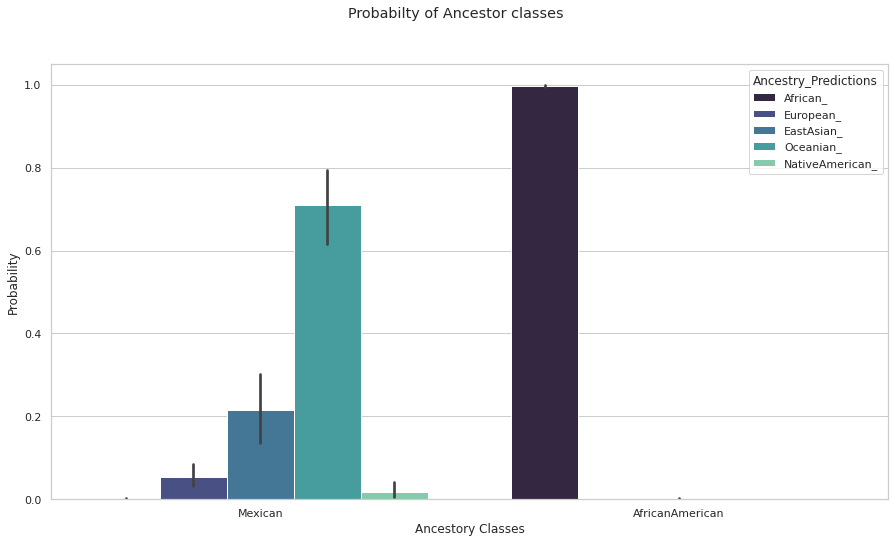

In [50]:
# Plot Probality prediction matrix
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
sns.barplot(data = prob_2[prob_2['Ancestry'] != 'Unknown'],color = 'r', x = 'Ancestry', y = 'Probability', hue = 'Ancestry_Predictions', palette = 'mako')
plt.xlabel('Ancestory Classes')
plt.ylabel('Probability')
plt.suptitle('Probabilty of Ancestor classes')
#plt.savefig("Assignment3_Deliverable4.png")
plt.show()

# **Deliverable 7.5**  <a class="anchor" id="Deliverable_6.5"></a>
How do the class label probabilities differ for the Mexican and African American samples when compared to the class label probabilities for the unknown samples? Are these class probabilities telling us something about recent history? Explain why these class probabilities are reasonable with respect to knowledge of recent history?

- In comparison to the class label probabilities for the unknown samples, those with unknown ancestry show a probability close to or equal to one while the other classes show a probability close to zero or less than one. African American samples showed similar results. The model assigned high probabilities to the African ancestry class for each of these samples. However, both Native American and European ancestry contribute high probabilities to the Mexican population on average with Native American slightly higher than European. 